In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    n = X.shape[0]
    
    result = (1/n) * np.sum(np.logaddexp(0,(-theta @ X.T) * y)) + l2_param * np.sum(theta**2)
    return result

In [ ]:
X_train=np.loadtxt('X_train.txt',delimiter=',')
X_val=np.loadtxt('X_val.txt',delimiter=',')
y_train=np.loadtxt('y_train.txt',delimiter=',')
y_val=np.loadtxt('y_val.txt',delimiter=',')


In [ ]:
from scipy.optimize import minimize

In [ ]:
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    X_mean = np.mean(X,axis=0)
    X_std = np.std(X,axis=0)
    X_norm=(X-X_mean)/X_std
    bias_term = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X_new = np.hstack((bias_term,X_norm))

    theta_0=np.zeros(X_new.shape[1])
    result=minimize(objective_function,theta_0,(X_new,y,l2_param))

    return result.x



In [ ]:
theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=1)

In [ ]:
X_val_mean = np.mean(X_val,axis=0)
X_val_std = np.std(X_val,axis=0)
X_val_norm=(X_val-X_val_mean)/X_val_std
bias_term_val = np.ones(X_val.shape[0]).reshape(X_val.shape[0],1)
X_val_new = np.hstack((bias_term_val,X_val_norm))

In [ ]:
lambda_list=[1e-12,1e-9,1e-6,1e-3,1e-1,1,100,1000,100000]
result_list=[]
for i in lambda_list:
  theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=i)
  res=f_objective(theta_hat, X_val_new, y_val, l2_param=i)
  result_list.append(res)


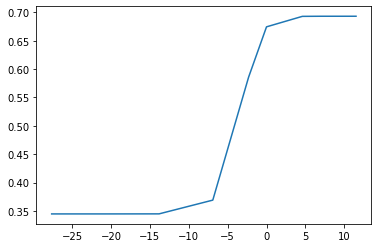

In [ ]:
plt.plot(np.log(lambda_list),result_list)

In [ ]:
lambda_list=[1e-1,1,100,1e3,1e6,1e9,1e12,1e15]
result_list=[]
for i in lambda_list:
  theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=i)
  res=f_objective(theta_hat, X_val_new, y_val, l2_param=i)
  result_list.append(res)

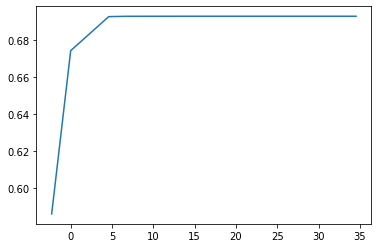

In [ ]:
plt.plot(np.log(lambda_list),result_list)

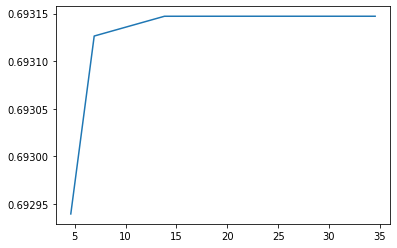

In [ ]:
lambda_list=[100,1e3,1e6,1e9,1e12,1e15]
result_list=[]
for i in lambda_list:
  theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=i)
  res=f_objective(theta_hat, X_val_new, y_val, l2_param=i)
  result_list.append(res)
plt.plot(np.log(lambda_list),result_list)

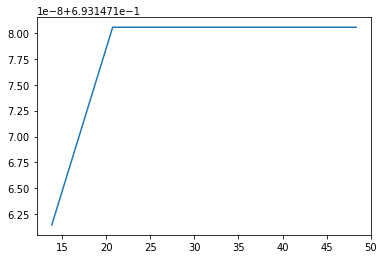

In [ ]:
lambda_list=[1e6,1e9,1e12,1e15,1e18,1e21]
result_list=[]
for i in lambda_list:
  theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=i)
  res=f_objective(theta_hat, X_val_new, y_val, l2_param=i)
  result_list.append(res)
plt.plot(np.log(lambda_list),result_list)

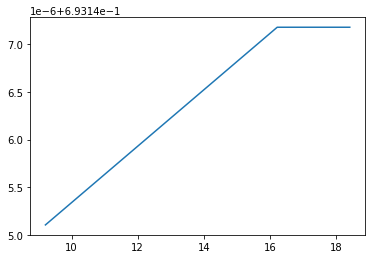

In [ ]:
result_list1=[]
for i in np.linspace(1e4,1e8,10):
  theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=i)
  res=f_objective(theta_hat, X_val_new, y_val, l2_param=i)
  result_list1.append(res)
plt.plot(np.log(np.linspace(1e4,1e8,10)),result_list1)

In [ ]:
max(result_list1)

0.6931471805599452

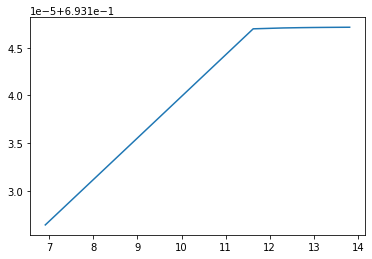

In [ ]:
result_list2=[]
for i in np.linspace(1e3,1e6,10):
  theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=i)
  res=f_objective(theta_hat, X_val_new, y_val, l2_param=i)
  result_list2.append(res)
plt.plot(np.log(np.linspace(1e3,1e6,10)),result_list2)

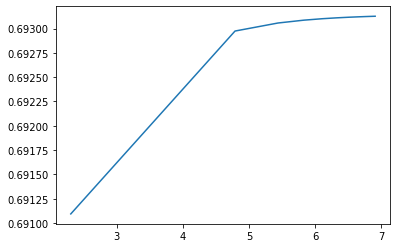

In [ ]:
result_list2=[]
for i in np.linspace(1e1,1e3,10):
  theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=i)
  res=f_objective(theta_hat, X_val_new, y_val, l2_param=i)
  result_list2.append(res)
plt.plot(np.log(np.linspace(1e1,1e3,10)),result_list2)

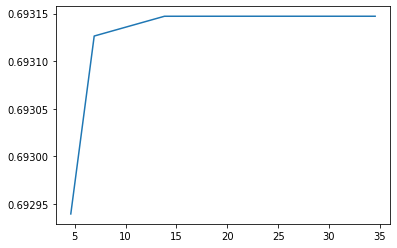

In [ ]:

result_list2=[]
for i in [100,1e3,1e6,1e9,1e12,1e15]:
  theta_hat=fit_logistic_reg(X_train, y_train, f_objective, l2_param=i)
  res=f_objective(theta_hat, X_val_new, y_val, l2_param=i)
  result_list2.append(res)
plt.plot(np.log([100,1e3,1e6,1e9,1e12,1e15]),result_list2)